In [6]:
from nltk import Tree
import spacy
import numpy as np

In [7]:
def tokenize(sent):
    nlp = spacy.load("en_core_web_sm")
    sent = [token.text for token in nlp(sent)]
    return sent

def random_parse(sentence):
    sentence_length = len(sentence)
    if sentence_length == 1:
        return sentence
    else:
        split_location = np.random.randint(sentence_length - 1) # Possible split space is length - 1
        left_split = sentence[:split_location + 1]
        right_split = sentence[split_location + 1:]
        return [' ( '] + random_parse(left_split) + [' '] + random_parse(right_split) + [' ) ']

def balanced_parse(sentence):
    sentence_length = len(sentence)
    if sentence_length == 1:
        return sentence
    else:
        split_location = int((sentence_length - 1) / 2) # Possible split space is length - 1
        left_split = sentence[:split_location + 1]
        right_split = sentence[split_location + 1:]
        return [' ( '] + balanced_parse(left_split) + [' '] + balanced_parse(right_split) + [' ) ']

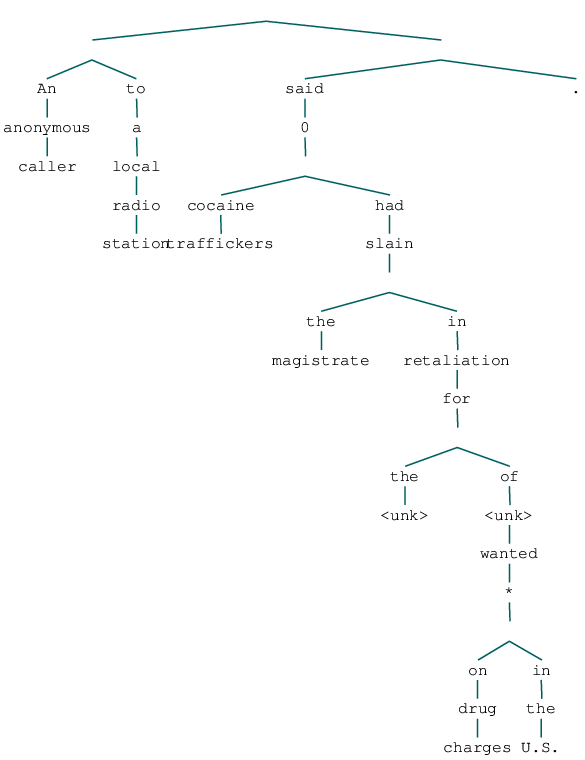

In [8]:
input_b = '(((An (anonymous caller)) (to (a (local (radio station))))) ((said (0 ((cocaine traffickers) (had (slain ((the magistrate) (in (retaliation (for ((the <unk>) (of (<unk> (wanted (* ((on (drug charges)) (in (the U.S.))))))))))))))))) .))'
input_a = '((An ((anonymous caller) (to (a (local (radio (station (said (0 (cocaine (traffickers (had (slain (the (magistrate (in (retaliation (for (the (<unk> (of (<unk> (wanted (* (on (drug (charges (in (the U.S.))))))))))))))))))))))))))))) .)'
t = Tree.fromstring(input_b)
t

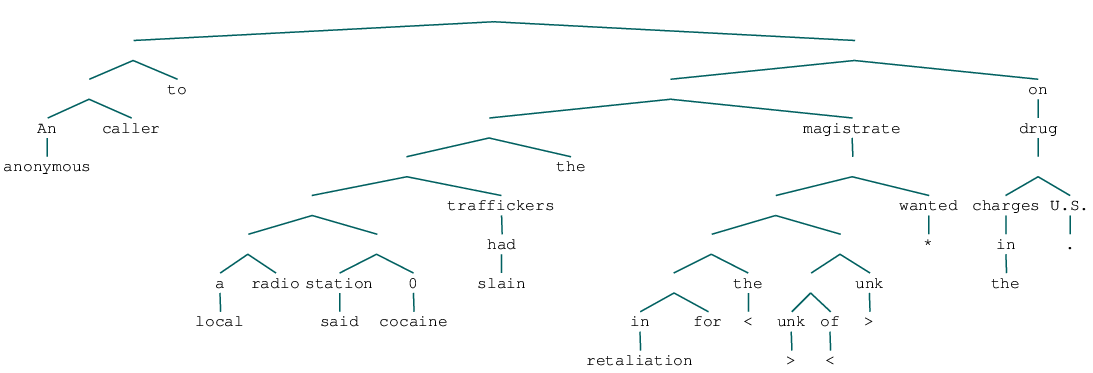

In [12]:
input_0 = input_a.replace('(', '').replace(')', '')
tokens = tokenize(input_0)
output = ''.join(random_parse(tokens))
t = Tree.fromstring(output)
t

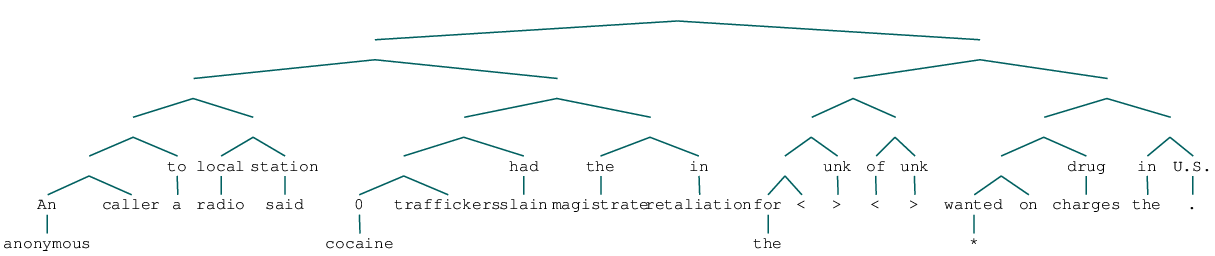

In [14]:
input_0 = input_a.replace('(', '').replace(')', '')
tokens = tokenize(input_0)
output = ''.join(balanced_parse(tokens))
t = Tree.fromstring(output)
t

In [15]:
output

' (  (  (  (  (  ( An anonymous )  caller )   ( to a )  )   (  ( local radio )   ( station said )  )  )   (  (  (  ( 0 cocaine )  traffickers )   ( had slain )  )   (  ( the magistrate )   ( in retaliation )  )  )  )   (  (  (  (  ( for the )  < )   ( unk > )  )   (  ( of < )   ( unk > )  )  )   (  (  (  ( wanted * )  on )   ( drug charges )  )   (  ( in the )   ( U.S. . )  )  )  )  ) '